In [4]:
import numpy
import pandas
import matplotlib
import seaborn
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import pickle
import json
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pandas.read_csv(r'healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# EDA:

# 1.Understanding the data

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df.shape

(5110, 12)

# 2.Unique Values

In [13]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

# Checking Null Values

In [15]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
df.isna().mean()*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

# 4.checking duplicate racords

In [17]:
df[df.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


# numeric columns and categorical columns

In [18]:
df.describe(include='int')   # numeric columns

,id,hypertension,heart_disease,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.097456,0.054012,0.048728
std,21161.721625,0.296607,0.226063,0.215320
min,67.000000,0.000000,0.000000,0.000000
25%,17741.250000,0.000000,0.000000,0.000000
50%,36932.000000,0.000000,0.000000,0.000000
75%,54682.000000,0.000000,0.000000,0.000000
max,72940.000000,1.000000,1.000000,1.000000


In [19]:
df.describe(include='object')      # categorical columns

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# 6.univariate and bivariate analysis

## univariate analysis

### univariate analysis for numeric columns

In [20]:
numerical_columns = df[['age','avg_glucose_level','bmi']]
numerical_columns

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5105,80.0,83.75,NaN
5106,81.0,125.20,40.0
5107,35.0,82.99,30.6
5108,51.0,166.29,25.6


<Axes: xlabel='age', ylabel='Count'>

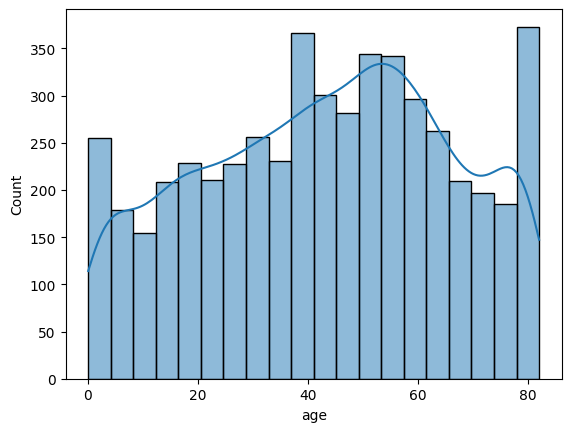

In [22]:
seaborn.histplot(numerical_columns.age,kde=True)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

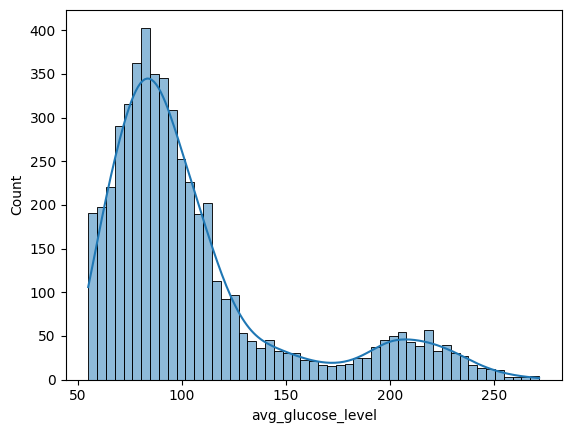

In [23]:
seaborn.histplot(numerical_columns.avg_glucose_level,kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

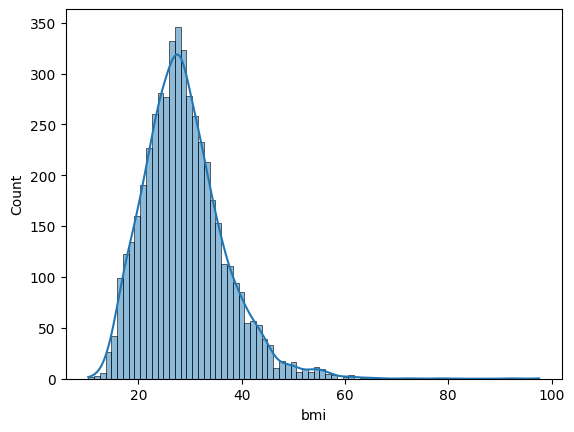

In [24]:
seaborn.histplot(numerical_columns.bmi,kde=True)

## univariate analysis for categorical columns

In [25]:
categorical_columns = df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',
                          'smoking_status','stroke']]
categorical_columns

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,never smoked,0
5106,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5107,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5108,Male,0,0,Yes,Private,Rural,formerly smoked,0


<Axes: xlabel='gender', ylabel='count'>

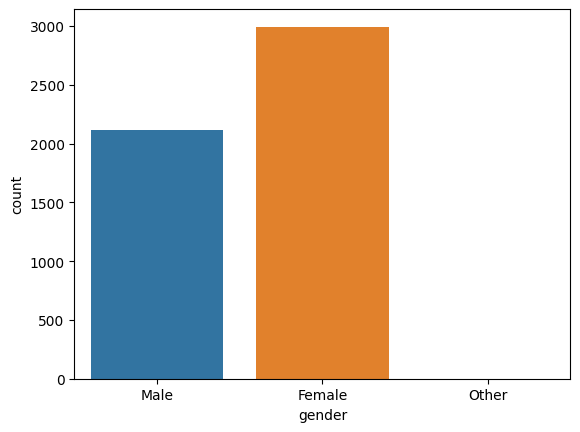

In [34]:
seaborn.countplot(x=categorical_columns.gender, data=df)

<Axes: xlabel='hypertension', ylabel='count'>

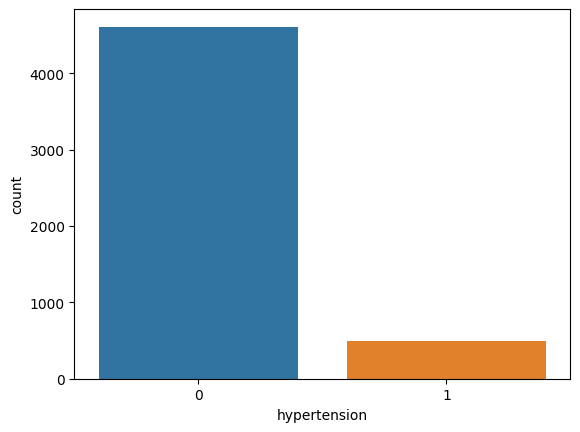

In [35]:
seaborn.countplot(x = categorical_columns.hypertension, data=df)

<Axes: xlabel='heart_disease', ylabel='count'>

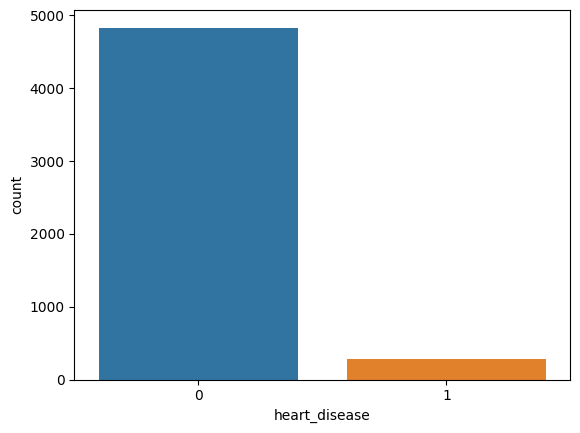

In [36]:
seaborn.countplot(x = categorical_columns.heart_disease, data=df)

<Axes: xlabel='ever_married', ylabel='count'>

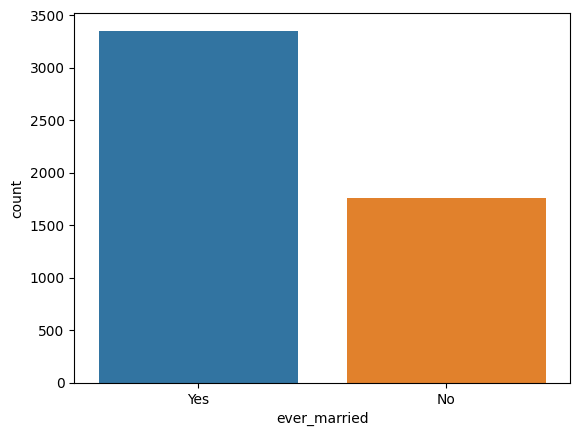

In [37]:
seaborn.countplot(x = categorical_columns.ever_married, data=df)

<Axes: xlabel='work_type', ylabel='count'>

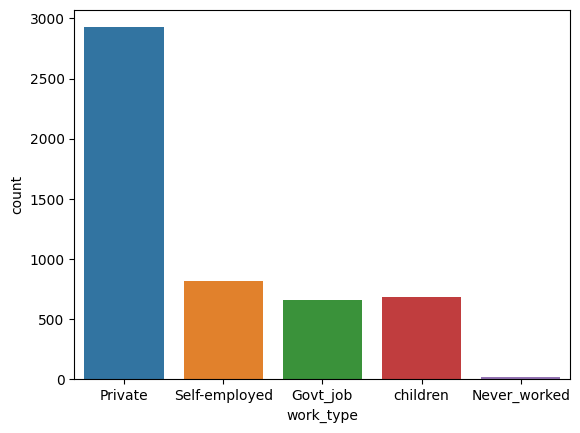

In [38]:
seaborn.countplot(x = categorical_columns.work_type, data=df)

<Axes: xlabel='Residence_type', ylabel='count'>

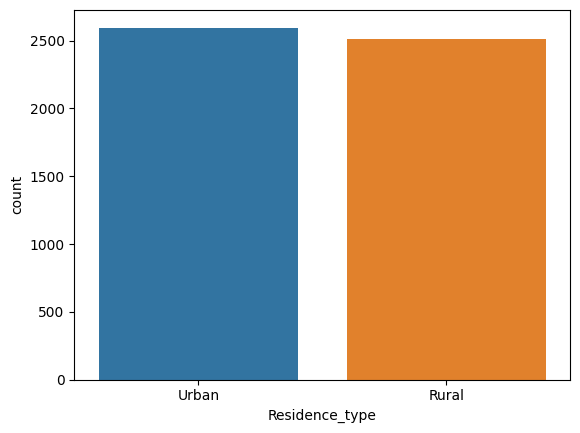

In [39]:
seaborn.countplot(x = categorical_columns.Residence_type, data=df)

<Axes: xlabel='smoking_status', ylabel='count'>

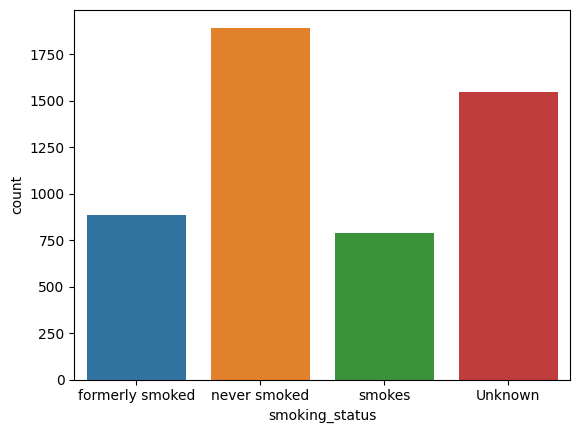

In [40]:
seaborn.countplot(x = categorical_columns.smoking_status, data=df)

<Axes: xlabel='stroke', ylabel='count'>

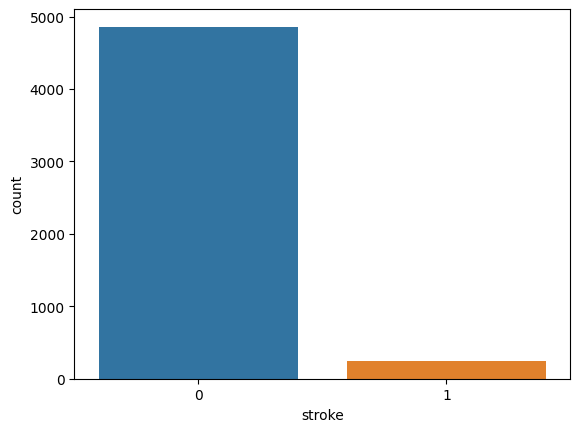

In [41]:
seaborn.countplot(x = categorical_columns.stroke, data=df)

## bivariate analysis

### bivariate analysis for numeric columns

In [42]:
numerical_columns.corr()         # cant see strong corelation between two numeric columns

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


In [43]:
numerical_columns = df[['age','avg_glucose_level','bmi']]
numerical_columns

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5105,80.0,83.75,NaN
5106,81.0,125.20,40.0
5107,35.0,82.99,30.6
5108,51.0,166.29,25.6


<Axes: xlabel='age', ylabel='avg_glucose_level'>

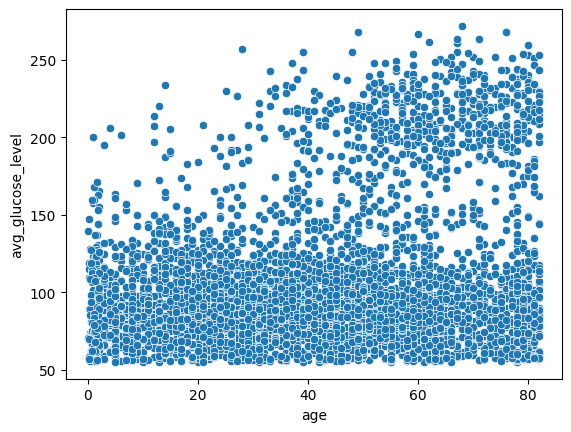

In [45]:
seaborn.scatterplot(x = numerical_columns.age,y=numerical_columns.avg_glucose_level, data=df)

<Axes: xlabel='age', ylabel='bmi'>

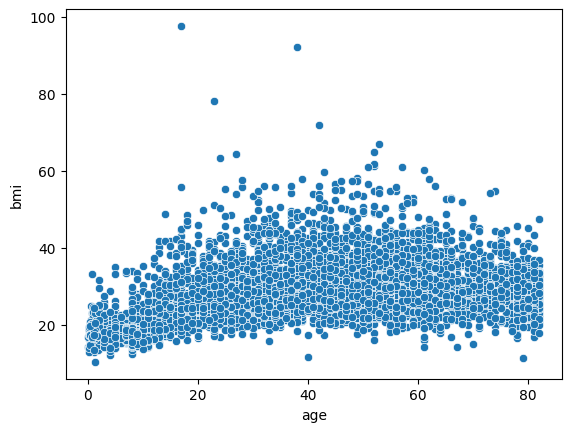

In [46]:
seaborn.scatterplot(x = numerical_columns.age,y=numerical_columns.bmi, data=df)

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

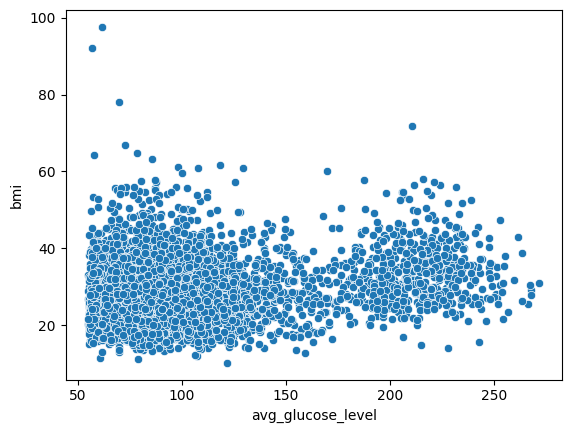

In [47]:
seaborn.scatterplot(x = numerical_columns.avg_glucose_level,y=numerical_columns.bmi, data=df)

## univariate analysis for categorical columns

In [48]:
categorical_columns = df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',
                          'smoking_status','stroke']]
categorical_columns

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,never smoked,0
5106,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5107,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5108,Male,0,0,Yes,Private,Rural,formerly smoked,0


AttributeError: 'numpy.int64' object has no attribute 'startswith'

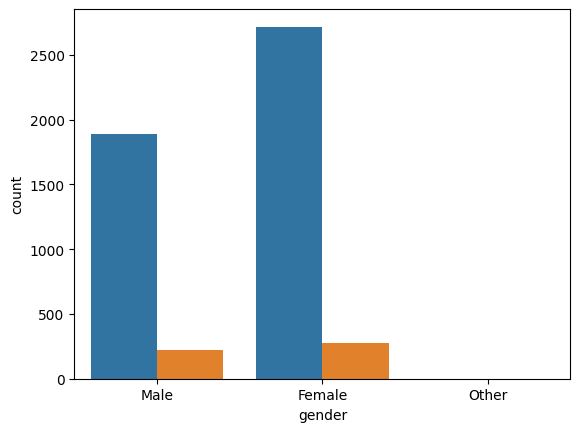

In [49]:
seaborn.countplot(data=categorical_columns,x='gender',hue='hypertension')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

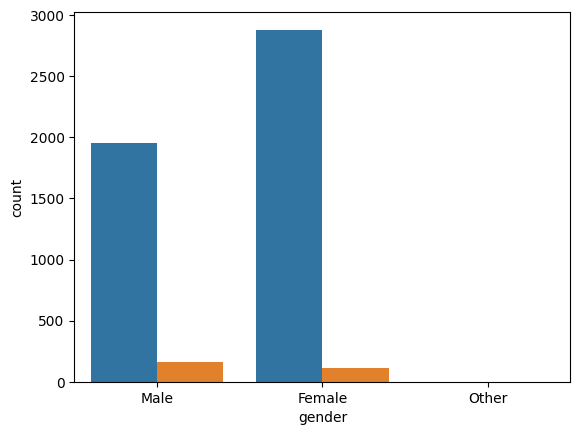

In [50]:
seaborn.countplot(data=categorical_columns,x='gender',hue='heart_disease')

<Axes: xlabel='gender', ylabel='count'>

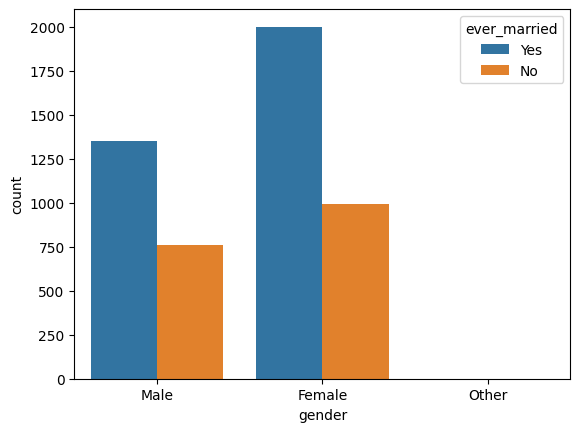

In [51]:
seaborn.countplot(data=categorical_columns,x='gender',hue='ever_married')

<Axes: xlabel='gender', ylabel='count'>

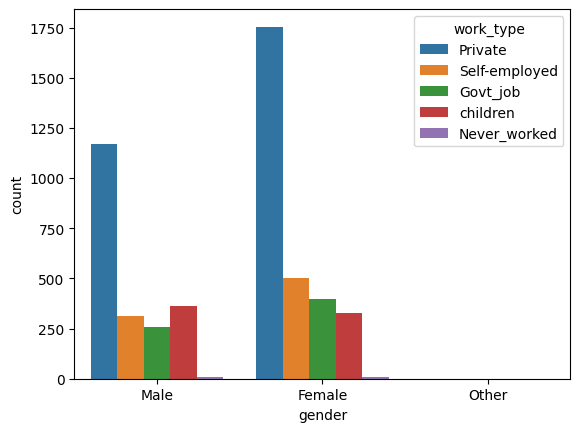

In [52]:
seaborn.countplot(data=categorical_columns,x='gender',hue='work_type')

<Axes: xlabel='gender', ylabel='count'>

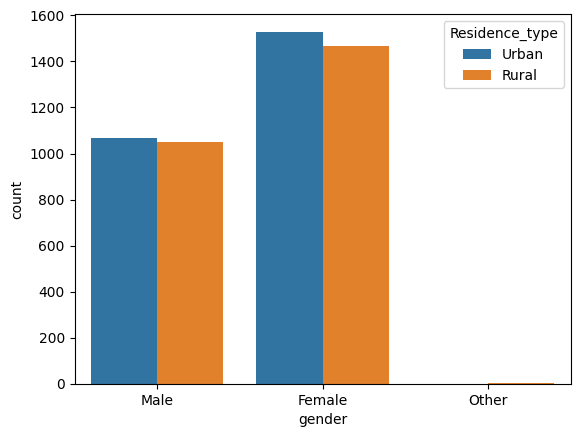

In [53]:
seaborn.countplot(data=categorical_columns,x='gender',hue='Residence_type')

<Axes: xlabel='gender', ylabel='count'>

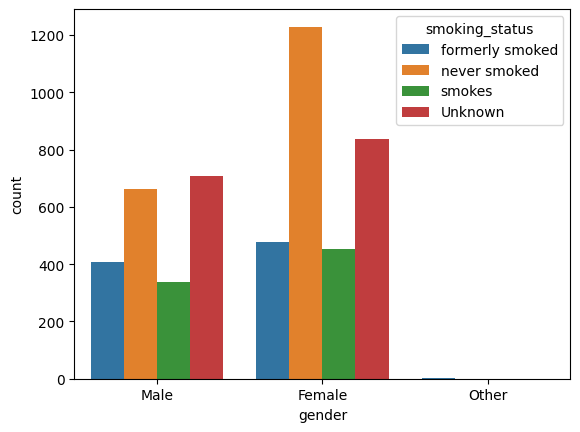

In [54]:
seaborn.countplot(data=categorical_columns,x='gender',hue='smoking_status')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

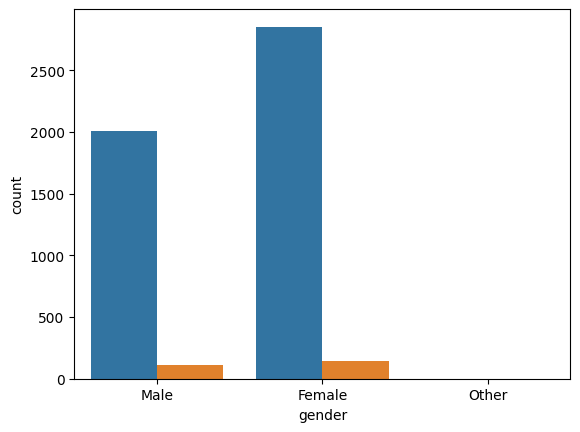

In [55]:
seaborn.countplot(data=categorical_columns,x='gender',hue='stroke')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

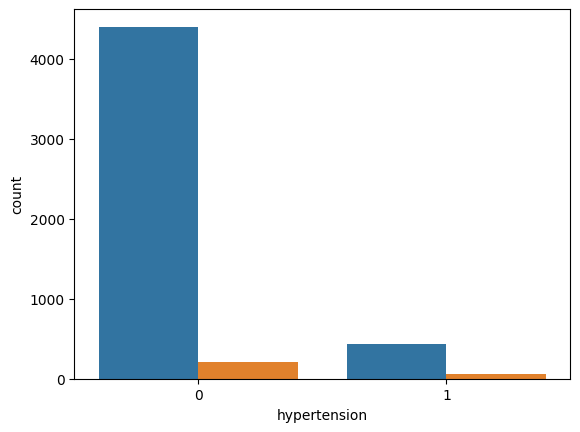

In [56]:
seaborn.countplot(data=categorical_columns,x='hypertension',hue='heart_disease')

<Axes: xlabel='hypertension', ylabel='count'>

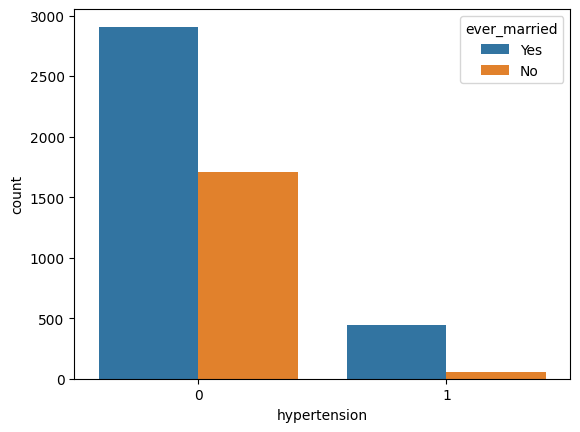

In [57]:
seaborn.countplot(data=categorical_columns,x='hypertension',hue='ever_married')

<Axes: xlabel='hypertension', ylabel='count'>

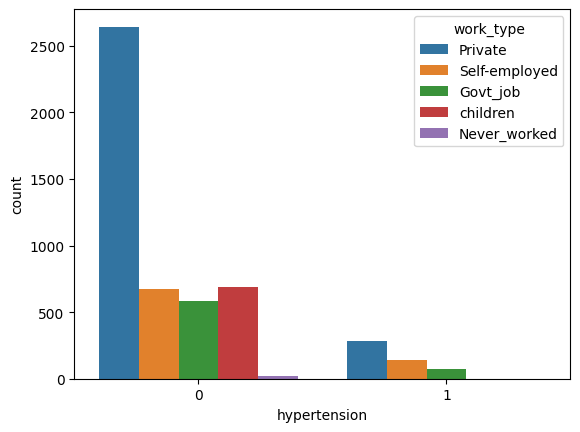

In [58]:
seaborn.countplot(data=categorical_columns,x='hypertension',hue='work_type')

<Axes: xlabel='hypertension', ylabel='count'>

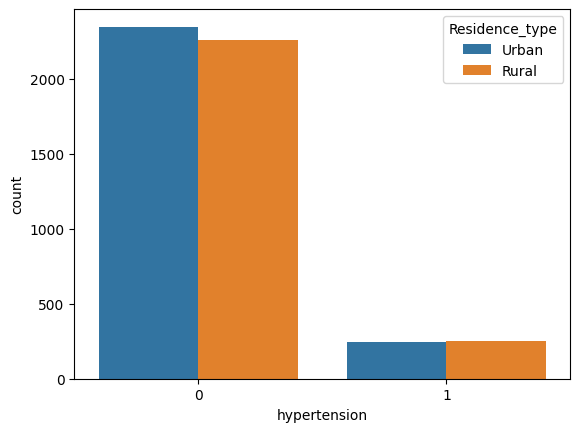

In [59]:
seaborn.countplot(data=categorical_columns,x='hypertension',hue='Residence_type')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

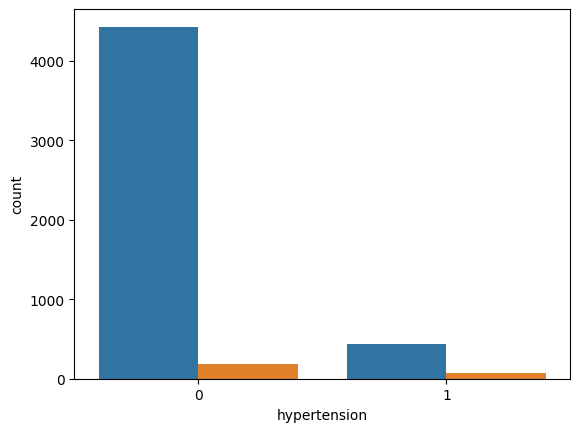

In [60]:
seaborn.countplot(data=categorical_columns,x='hypertension',hue='stroke')

<Axes: xlabel='heart_disease', ylabel='count'>

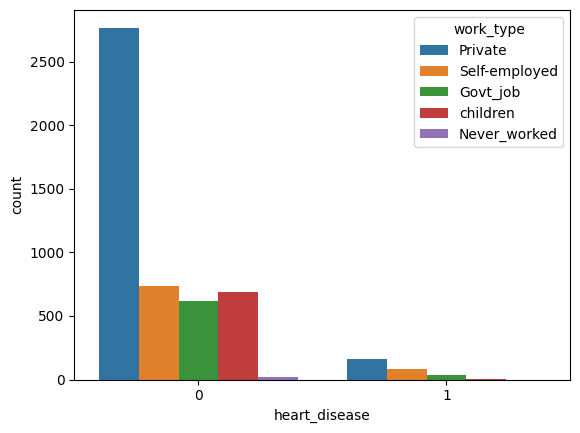

In [61]:
seaborn.countplot(data=categorical_columns,x='heart_disease',hue='work_type')

<Axes: xlabel='heart_disease', ylabel='count'>

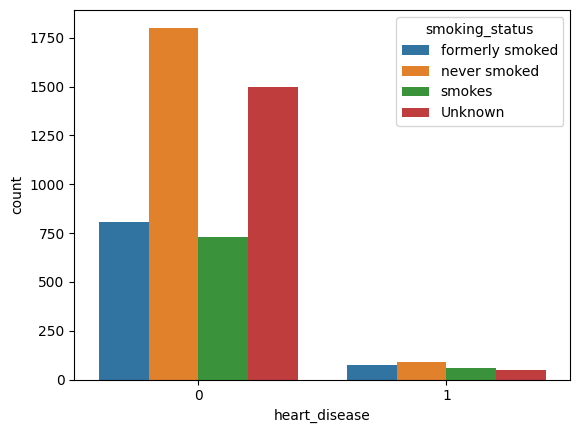

In [62]:
seaborn.countplot(data=categorical_columns,x='heart_disease',hue='smoking_status')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

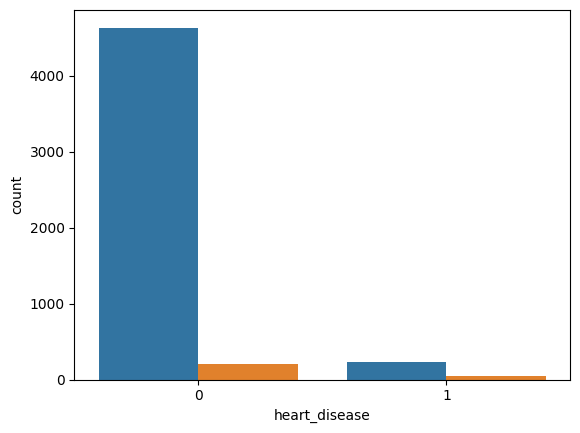

In [63]:
seaborn.countplot(data=categorical_columns,x='heart_disease',hue='stroke')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

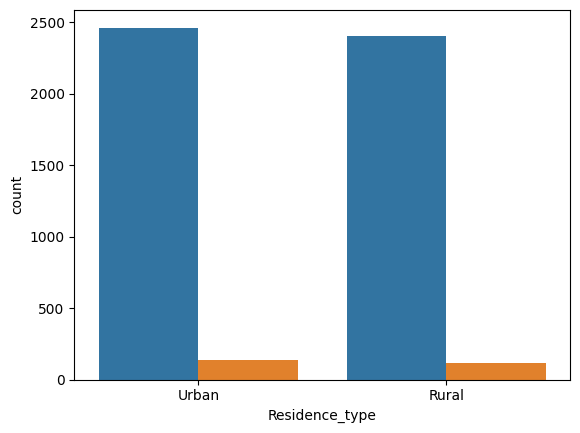

In [64]:
seaborn.countplot(data=categorical_columns,x='Residence_type',hue='stroke')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

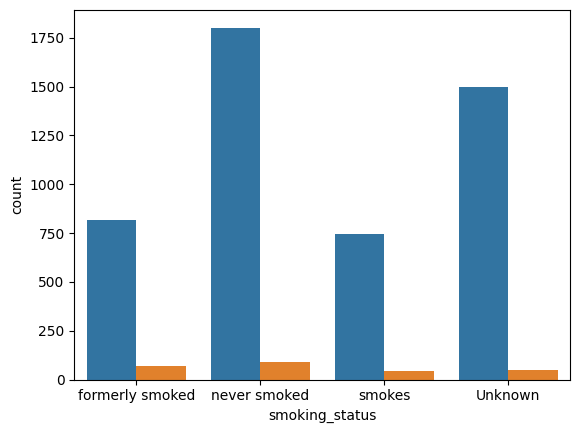

In [65]:
seaborn.countplot(data=categorical_columns,x='smoking_status',hue='stroke')

# 7.knowing the percentage of classification in churn using pie chart:

In [66]:
stroke_count = df['stroke'].value_counts()
stroke_count

stroke
0    4861
1     249
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x265c1b288d0>,
 [Text(-1.0871361453364168, 0.16773491438301516, 'healthy'),
  Text(1.185966701861844, -0.18298355684306683, 'stroke')],
 [Text(-0.5929833520016818, 0.09149177148164463, '95.1%'),
  Text(0.691813909419409, -0.10674040815845563, '4.9%')])

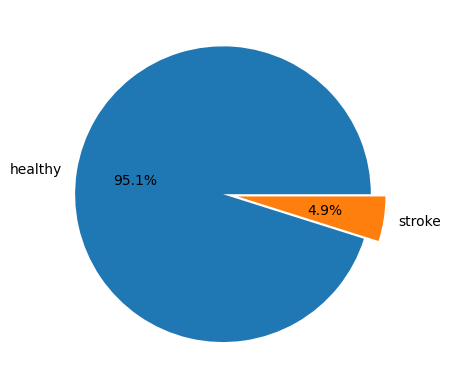

In [68]:
matplotlib.pyplot.pie(x=stroke_count, explode=(0,0.1), labels=['healthy', 'stroke'], autopct='%1.1f%%')

# 8.knowing the percentage of classification in churn using countplot chart:

<Axes: xlabel='stroke', ylabel='count'>

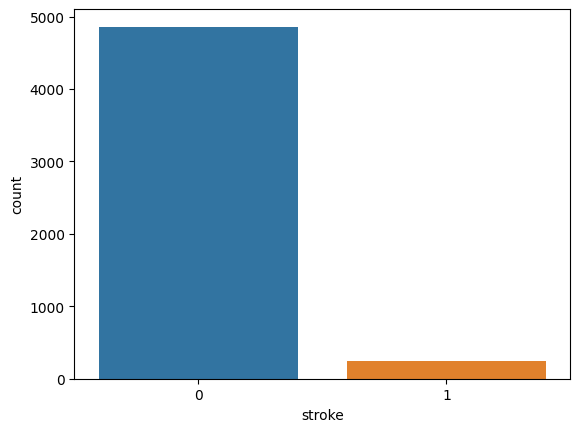

In [70]:
seaborn.countplot(data=df, x=categorical_columns.stroke)

# 9.knowing the relation between each features using pair plot:

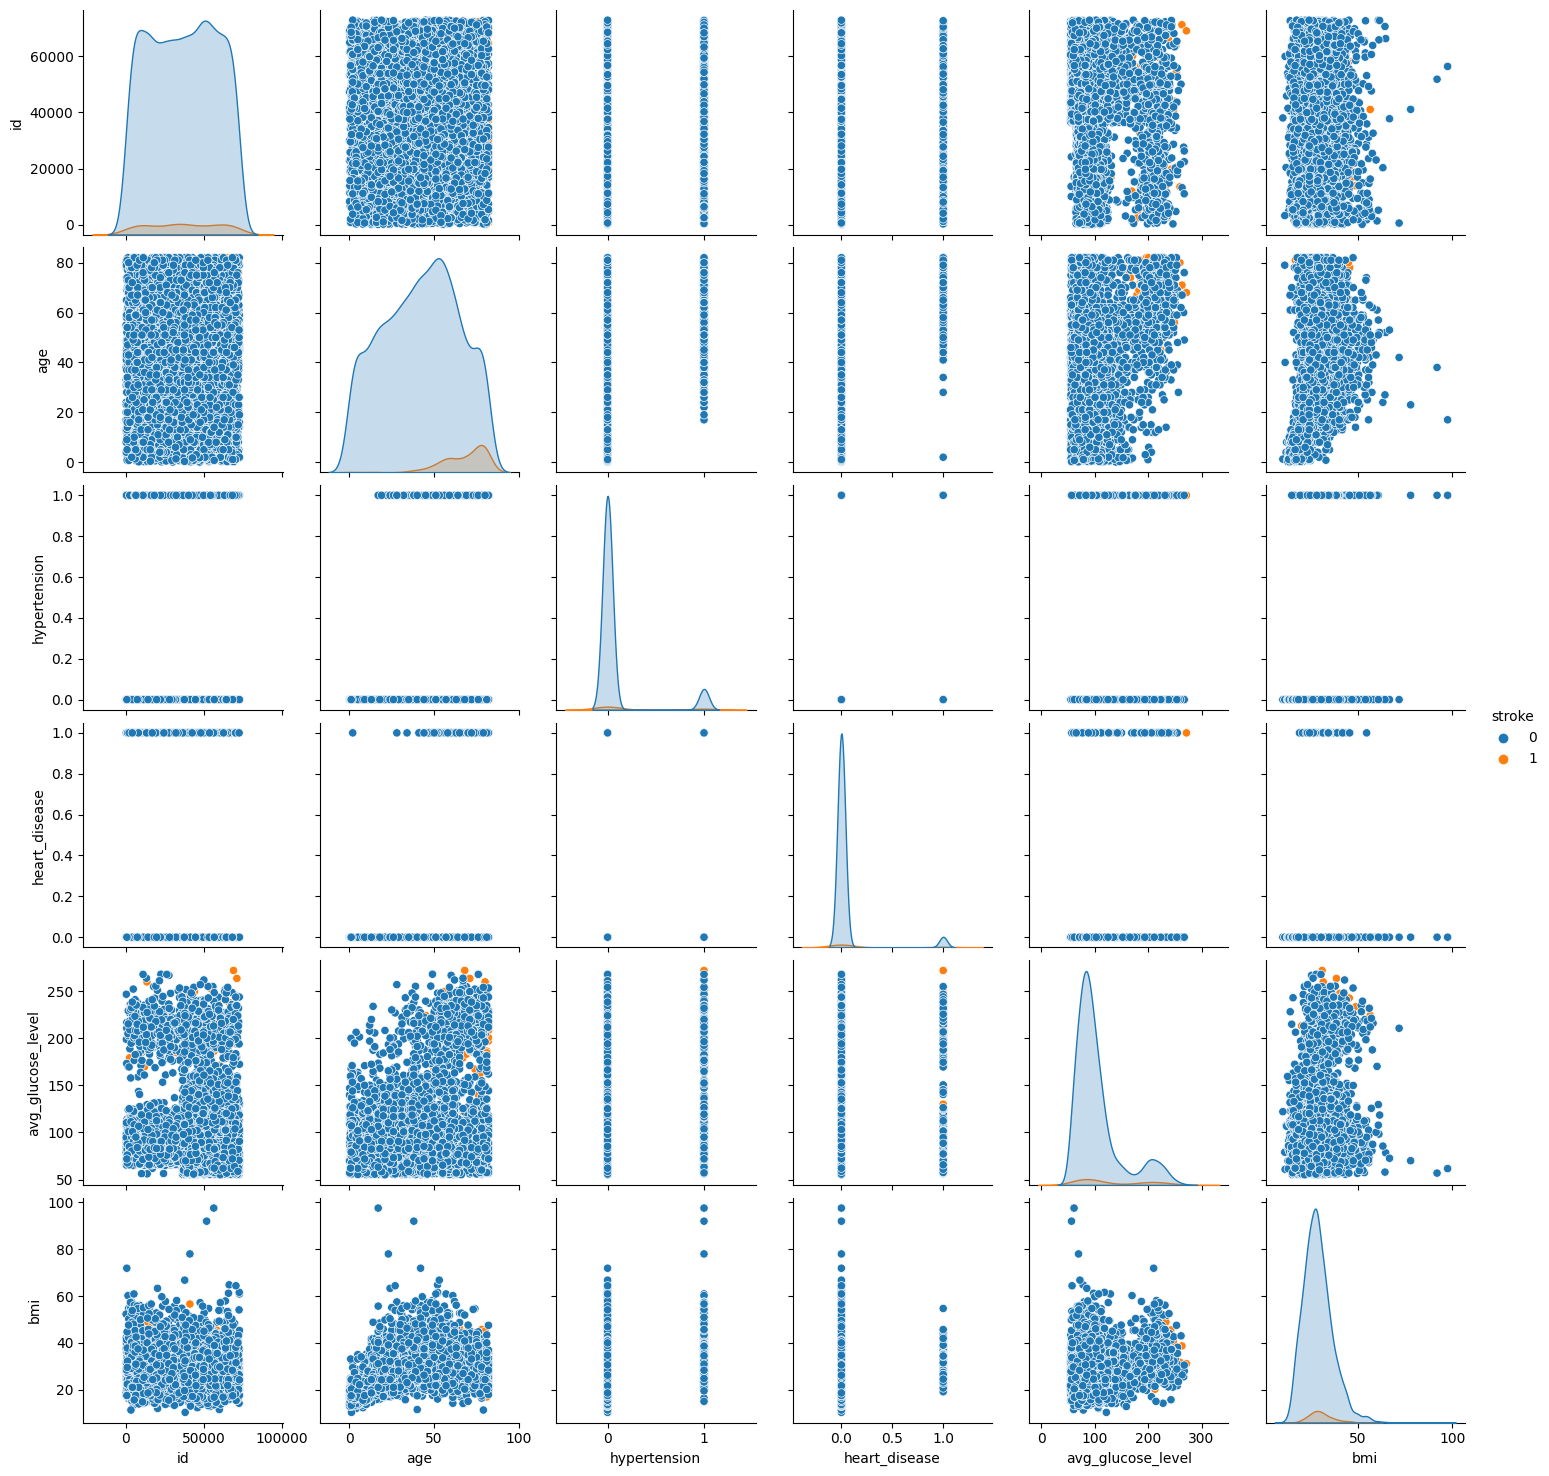

In [72]:
seaborn.pairplot(data=df,hue='stroke')
matplotlib.pyplot.show()

# 10.knowing the distribution of numeric columns:

<Axes: >

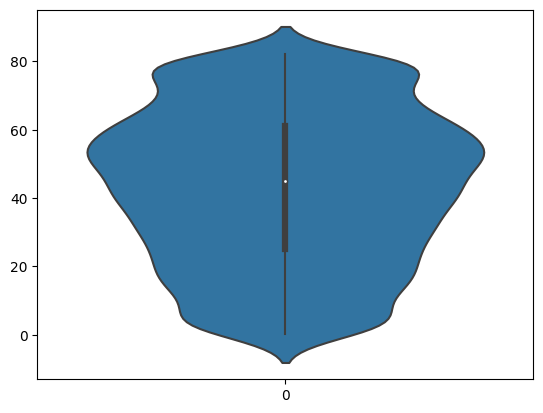

In [73]:
seaborn.violinplot(numerical_columns['age'])

<Axes: >

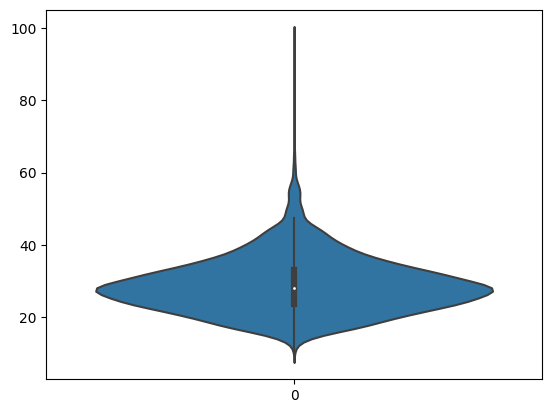

In [74]:
seaborn.violinplot(numerical_columns['bmi'])

<Axes: >

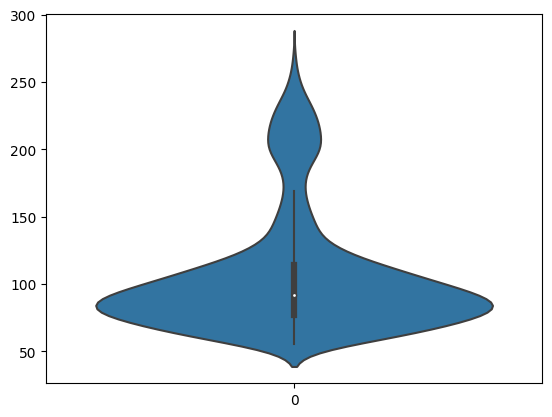

In [75]:
seaborn.violinplot(numerical_columns['avg_glucose_level'])

# 11.detect outliers:

<Axes: >

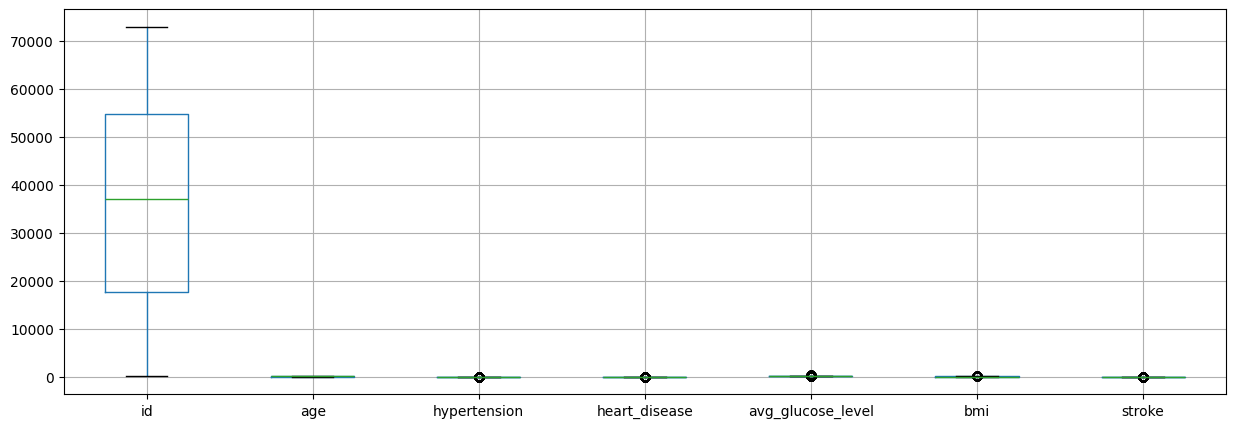

In [76]:
matplotlib.pyplot.figure(figsize=(15,5))
df.boxplot() 

<Axes: >

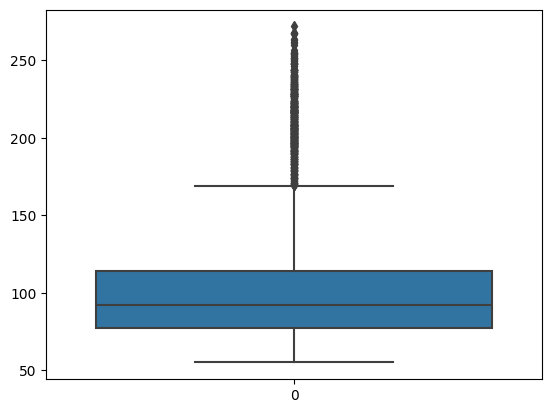

In [77]:
seaborn.boxplot(df['avg_glucose_level'])

<Axes: >

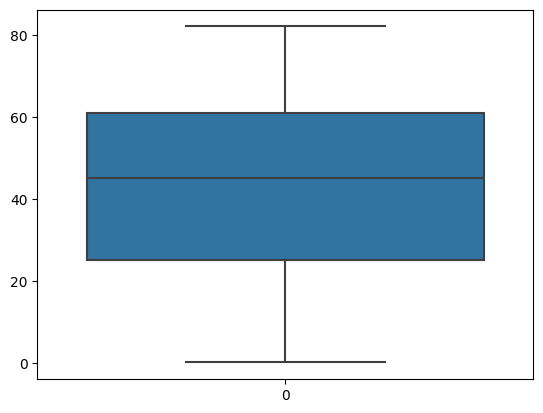

In [78]:
seaborn.boxplot(df['age'])

<Axes: >

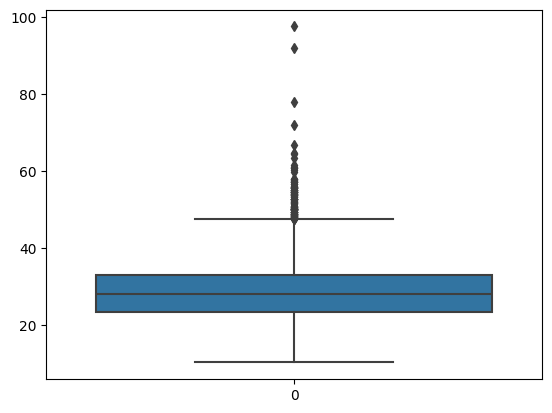

In [79]:
seaborn.boxplot(df['bmi'])

# Feature Engineering

In [80]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [81]:
df.drop(['id'],axis=1,inplace=True)      # drop irrevalant features

In [82]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Handling missing values

In [83]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [84]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())        # filled missing values with mean

In [85]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [86]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# one hot encoding:

In [88]:
df = pandas.get_dummies(df,columns=['work_type','smoking_status'])
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Urban,228.69,36.600000,1,False,False,True,False,False,False,True,False,False
1,Female,61.0,0,0,Yes,Rural,202.21,28.893237,1,False,False,False,True,False,False,False,True,False
2,Male,80.0,0,1,Yes,Rural,105.92,32.500000,1,False,False,True,False,False,False,False,True,False
3,Female,49.0,0,0,Yes,Urban,171.23,34.400000,1,False,False,True,False,False,False,False,False,True
4,Female,79.0,1,0,Yes,Rural,174.12,24.000000,1,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Urban,83.75,28.893237,0,False,False,True,False,False,False,False,True,False
5106,Female,81.0,0,0,Yes,Urban,125.20,40.000000,0,False,False,False,True,False,False,False,True,False
5107,Female,35.0,0,0,Yes,Rural,82.99,30.600000,0,False,False,False,True,False,False,False,True,False
5108,Male,51.0,0,0,Yes,Rural,166.29,25.600000,0,False,False,True,False,False,False,True,False,False


# label encoding:

In [89]:
df['gender']=df['gender'].replace({'Male':0,'Female':1,'Other':2})
df['gender']

0       0
1       1
2       0
3       1
4       1
       ..
5105    1
5106    1
5107    1
5108    0
5109    1
Name: gender, Length: 5110, dtype: int64

In [90]:
df['ever_married']=df['ever_married'].replace({'Yes':0,'No':1})
df['ever_married']

0       0
1       0
2       0
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: ever_married, Length: 5110, dtype: int64

In [91]:
df['Residence_type']=df['Residence_type'].replace({'Urban':0,'Rural':1})
df['Residence_type']

0       0
1       1
2       1
3       0
4       1
       ..
5105    0
5106    0
5107    1
5108    1
5109    0
Name: Residence_type, Length: 5110, dtype: int64

In [92]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,0,0,228.69,36.600000,1,False,False,True,False,False,False,True,False,False
1,1,61.0,0,0,0,1,202.21,28.893237,1,False,False,False,True,False,False,False,True,False
2,0,80.0,0,1,0,1,105.92,32.500000,1,False,False,True,False,False,False,False,True,False
3,1,49.0,0,0,0,0,171.23,34.400000,1,False,False,True,False,False,False,False,False,True
4,1,79.0,1,0,0,1,174.12,24.000000,1,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,0,83.75,28.893237,0,False,False,True,False,False,False,False,True,False
5106,1,81.0,0,0,0,0,125.20,40.000000,0,False,False,False,True,False,False,False,True,False
5107,1,35.0,0,0,0,1,82.99,30.600000,0,False,False,False,True,False,False,False,True,False
5108,0,51.0,0,0,0,1,166.29,25.600000,0,False,False,True,False,False,False,True,False,False


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   work_type_Govt_job              5110 non-null   bool   
 10  work_type_Never_worked          5110 non-null   bool   
 11  work_type_Private               5110 non-null   bool   
 12  work_type_Self-employed         51

In [94]:
# change datatype of features to int

In [95]:
df['gender'] = df['gender'].astype(int)
df['age'] = df['age'].astype(int)
df['avg_glucose_level'] = df['avg_glucose_level'].astype(int)
df['bmi'] = df['bmi'].astype(int)
df['work_type_Govt_job'] = df['work_type_Govt_job'].astype(int)
df['work_type_Never_worked'] = df['work_type_Never_worked'].astype(int)
df['work_type_Private'] = df['work_type_Private'].astype(int)
df['work_type_Self-employed'] = df['work_type_Self-employed'].astype(int)
df['work_type_children'] = df['work_type_children'].astype(int)
df['smoking_status_Unknown'] = df['smoking_status_Unknown'].astype(int)
df['smoking_status_formerly smoked'] = df['smoking_status_formerly smoked'].astype(int)
df['smoking_status_never smoked'] = df['smoking_status_never smoked'].astype(int)
df['smoking_status_smokes'] = df['smoking_status_smokes'].astype(int)

In [96]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67,0,1,0,0,228,36,1,0,0,1,0,0,0,1,0,0
1,1,61,0,0,0,1,202,28,1,0,0,0,1,0,0,0,1,0
2,0,80,0,1,0,1,105,32,1,0,0,1,0,0,0,0,1,0
3,1,49,0,0,0,0,171,34,1,0,0,1,0,0,0,0,0,1
4,1,79,1,0,0,1,174,24,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,0,0,83,28,0,0,0,1,0,0,0,0,1,0
5106,1,81,0,0,0,0,125,40,0,0,0,0,1,0,0,0,1,0
5107,1,35,0,0,0,1,82,30,0,0,0,0,1,0,0,0,1,0
5108,0,51,0,0,0,1,166,25,0,0,0,1,0,0,0,1,0,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   gender                          5110 non-null   int32
 1   age                             5110 non-null   int32
 2   hypertension                    5110 non-null   int64
 3   heart_disease                   5110 non-null   int64
 4   ever_married                    5110 non-null   int64
 5   Residence_type                  5110 non-null   int64
 6   avg_glucose_level               5110 non-null   int32
 7   bmi                             5110 non-null   int32
 8   stroke                          5110 non-null   int64
 9   work_type_Govt_job              5110 non-null   int32
 10  work_type_Never_worked          5110 non-null   int32
 11  work_type_Private               5110 non-null   int32
 12  work_type_Self-employed         5110 non-null   int32
 13  wor

# handling Outliers:

## 1.detect range of outliers using IQR method:

In [ ]:
# avg_glucose_level

In [98]:
outliers_feat = ['avg_glucose_level','bmi']

q1 = df['avg_glucose_level'].quantile(0.25)
print(f'q1 = {q1}')
q3 = df['avg_glucose_level'].quantile(0.75)
print(f'q3 = {q3}')

iqr=q3-q1
print(f'iqr = {iqr}')

upper_limit1 = q3 + 1.5*(iqr)
print(f'upper_limit1 = {upper_limit1}')

lower_limit1 = q1 - 1.5*(iqr)
print(f'lower_limit1 = {lower_limit1}')

q1 = 77.0
q3 = 114.0
iqr = 37.0
upper_limit1 = 169.5
lower_limit1 = 21.5


In [99]:
df.loc[(df['avg_glucose_level']<lower_limit1)|(df['avg_glucose_level']>upper_limit1)]

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67,0,1,0,0,228,36,1,0,0,1,0,0,0,1,0,0
1,1,61,0,0,0,1,202,28,1,0,0,0,1,0,0,0,1,0
3,1,49,0,0,0,0,171,34,1,0,0,1,0,0,0,0,0,1
4,1,79,1,0,0,1,174,24,1,0,0,0,1,0,0,0,1,0
5,0,81,0,0,0,0,186,29,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5061,0,41,0,0,0,0,223,32,0,0,0,1,0,0,0,0,1,0
5062,1,82,0,0,0,1,211,36,0,0,0,0,1,0,0,0,1,0
5063,0,39,0,0,0,0,179,27,0,0,0,1,0,0,1,0,0,0
5064,0,70,0,0,0,1,193,24,0,0,0,0,1,0,1,0,0,0


In [100]:
df.loc[(df['avg_glucose_level']<lower_limit1)|(df['avg_glucose_level']>upper_limit1)].shape

(622, 18)

In [102]:
# bmi
outliers_feat = ['avg_glucose_level','bmi']

q1 = df['bmi'].quantile(0.25)
print(f'q1 = {q1}')
q3 = df['bmi'].quantile(0.75)
print(f'q3 = {q3}')

iqr=q3-q1
print(f'iqr = {iqr}')

upper_limit2 = q3 + 1.5*(iqr)
print(f'upper_limit2 = {upper_limit2}')

lower_limit2 = q1 - 1.5*(iqr)
print(f'lower_limit2 = {lower_limit2}')

q1 = 23.0
q3 = 32.0
iqr = 9.0
upper_limit2 = 45.5
lower_limit2 = 9.5


In [103]:
df.loc[(df['bmi']<lower_limit2)|(df['bmi']>upper_limit2)]

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
21,1,52,1,0,0,0,233,48,1,0,0,0,1,0,0,0,1,0
66,1,70,0,0,0,0,221,47,1,0,0,1,0,0,0,0,1,0
113,1,45,0,0,0,1,224,56,1,0,0,1,0,0,0,0,1,0
190,1,65,0,0,0,0,205,46,1,0,0,1,0,0,0,1,0,0
254,1,47,0,0,0,0,210,50,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,0,51,1,0,0,1,211,56,0,0,0,0,1,0,0,0,1,0
4976,1,18,0,0,1,0,101,46,0,0,0,1,0,0,0,1,0,0
5009,1,50,0,0,0,1,126,49,0,0,0,0,1,0,0,1,0,0
5057,1,49,0,0,0,0,69,47,0,1,0,0,0,0,0,0,1,0


In [104]:
df.loc[(df['bmi']<lower_limit2)|(df['bmi']>upper_limit2)].shape

(133, 18)

# impute outliers using mean:

In [105]:
#avg_glucose_level

In [107]:
df['avg_glucose_level'] = numpy.where(df['avg_glucose_level']<lower_limit1,df['avg_glucose_level'].mean(),numpy.where
                        (df['avg_glucose_level']>upper_limit1,df['avg_glucose_level'].mean(),df['avg_glucose_level']))

In [108]:
df.loc[[0,1,3]]

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67,0,1,0,0,105.658317,36,1,0,0,1,0,0,0,1,0,0
1,1,61,0,0,0,1,105.658317,28,1,0,0,0,1,0,0,0,1,0
3,1,49,0,0,0,0,105.658317,34,1,0,0,1,0,0,0,0,0,1


In [110]:
df['bmi'] = numpy.where(df['bmi']<lower_limit2,df['bmi'].mean(),numpy.where
                        (df['bmi']>upper_limit2,df['bmi'].mean(),df['bmi']))

In [111]:
df.loc[[21,66,113]]

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
21,1,52,1,0,0,0,105.658317,28.43092,1,0,0,0,1,0,0,0,1,0
66,1,70,0,0,0,0,105.658317,28.43092,1,0,0,1,0,0,0,0,1,0
113,1,45,0,0,0,1,105.658317,28.43092,1,0,0,1,0,0,0,0,1,0


In [112]:
df['avg_glucose_level'] = df['avg_glucose_level'] .astype(int)
df['bmi'] = df['bmi'] .astype(int)

In [113]:
# clean data with no outliers , null values and all records are in int

In [114]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67,0,1,0,0,105,36,1,0,0,1,0,0,0,1,0,0
1,1,61,0,0,0,1,105,28,1,0,0,0,1,0,0,0,1,0
2,0,80,0,1,0,1,105,32,1,0,0,1,0,0,0,0,1,0
3,1,49,0,0,0,0,105,34,1,0,0,1,0,0,0,0,0,1
4,1,79,1,0,0,1,105,24,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,0,0,83,28,0,0,0,1,0,0,0,0,1,0
5106,1,81,0,0,0,0,125,40,0,0,0,0,1,0,0,0,1,0
5107,1,35,0,0,0,1,82,30,0,0,0,0,1,0,0,0,1,0
5108,0,51,0,0,0,1,166,25,0,0,0,1,0,0,0,1,0,0


# Sampling of dataset:

In [115]:
df['stroke'].value_counts() 

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

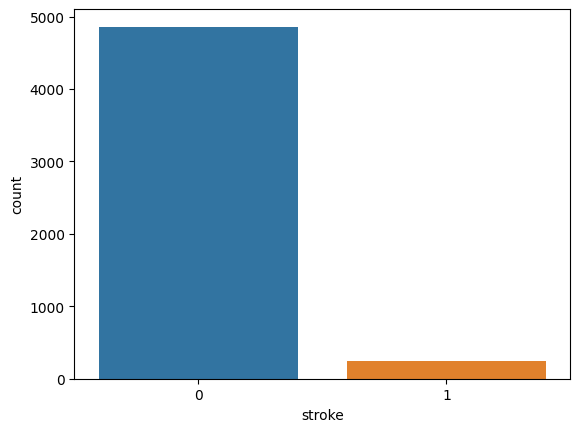

In [117]:
seaborn.countplot(x = df.stroke, data=df)     # it is imbalance dataset 

# balancing dataset using RandomOverSampling:

In [118]:
x = df.drop('stroke',axis=1)
y = df['stroke']

In [119]:
oversample = RandomOverSampler(sampling_strategy=1)
x_over, y_over = oversample.fit_resample(x, y)
y_over.value_counts()

stroke
1    4861
0    4861
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

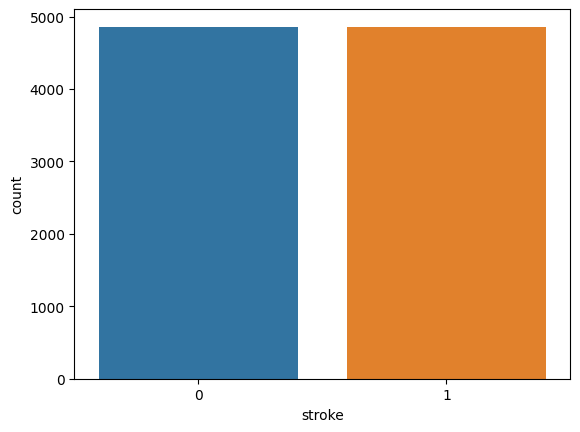

In [122]:
seaborn.countplot(x = y_over, data=df)     # it is balance dataset 

# Model Training:

In [124]:
x = x_over
y = y_over

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
x_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1304,1,46,0,0,1,1,79,28,0,0,1,0,0,1,0,0,0
6763,0,43,0,0,0,0,143,45,0,0,0,1,0,1,0,0,0
9053,0,57,0,1,1,0,105,28,1,0,0,0,0,1,0,0,0
7627,1,57,0,1,0,0,105,31,0,0,1,0,0,1,0,0,0
8108,1,82,1,1,1,1,84,26,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,1,58,0,0,0,0,107,38,0,0,1,0,0,0,1,0,0
7291,1,76,0,0,0,1,62,28,1,0,0,0,0,0,1,0,0
1344,0,47,0,0,0,1,86,39,0,0,1,0,0,0,0,0,1
7293,0,67,0,1,0,0,105,36,0,0,1,0,0,0,1,0,0


In [125]:
x_test

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2167,0,40,0,0,0,1,80,30,0,0,1,0,0,0,1,0,0
9191,1,51,0,0,0,1,103,27,1,0,0,0,0,0,1,0,0
2790,0,10,0,0,1,1,68,18,0,0,0,0,1,1,0,0,0
1733,1,45,0,0,0,1,77,37,0,0,1,0,0,0,0,0,1
2318,1,51,1,0,0,0,105,31,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,0,28,0,0,1,0,116,36,0,0,1,0,0,0,1,0,0
1302,1,65,0,0,0,1,167,27,0,0,0,1,0,0,0,1,0
8216,1,57,0,0,0,0,110,28,1,0,0,0,0,1,0,0,0
3806,1,18,0,0,1,1,92,24,0,0,1,0,0,1,0,0,0


In [126]:
y_train

1304    0
6763    1
9053    1
7627    1
8108    1
       ..
9372    1
7291    1
1344    0
7293    1
1289    0
Name: stroke, Length: 7777, dtype: int64

In [127]:
y_test

2167    0
9191    1
2790    0
1733    0
2318    0
       ..
2511    0
1302    0
8216    1
3806    0
3776    0
Name: stroke, Length: 1945, dtype: int64

# 1.Logistic Regression:

In [128]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# evaluation of train dataset:


In [129]:
y_pred_train = log_reg.predict(x_train)
y_pred_train

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [130]:
conf_mat = confusion_matrix(y_train,y_pred_train)
conf_mat

array([[2816, 1047],
       [ 717, 3197]], dtype=int64)

In [131]:
cls_rep = classification_report(y_train,y_pred_train)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      3863
           1       0.75      0.82      0.78      3914

    accuracy                           0.77      7777
   macro avg       0.78      0.77      0.77      7777
weighted avg       0.78      0.77      0.77      7777



In [132]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.7731773177317732

In [133]:
# evalution of test dataset:
y_pred_test = log_reg.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [134]:
conf_mat = confusion_matrix(y_test,y_pred_test)
conf_mat

array([[741, 257],
       [189, 758]], dtype=int64)

In [135]:
cls_rep = classification_report(y_test,y_pred_test)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       998
           1       0.75      0.80      0.77       947

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.77      1945
weighted avg       0.77      0.77      0.77      1945



In [136]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.770694087403599

In [137]:
# # we got train_acc=0.76 and test=0.77 

In [138]:
# hyperparameter tunning:

In [139]:
log_hyp = LogisticRegression()
hyperparameters = {'C': [0.1, 1, 10],
                  'solver': ['liblinear', 'lbfgs'],
                  'max_iter': [100]}
gscv_log_hyp = GridSearchCV(log_hyp,hyperparameters,cv=5)
gscv_log_hyp.fit(x_train,y_train)
gscv_log_hyp.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [140]:
log_hyp_model = gscv_log_hyp.best_estimator_
log_hyp_model.fit(x_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [141]:
# Evalution of model after hyperparameter tunning:
# tratining
y_pred_train = log_hyp_model.predict(x_train)
y_pred_train

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [142]:
cnf_mat = confusion_matrix(y_train,y_pred_train)
cnf_mat

array([[2804, 1059],
       [ 655, 3259]], dtype=int64)

In [143]:
clf_repo = classification_report(y_train,y_pred_train)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      3863
           1       0.75      0.83      0.79      3914

    accuracy                           0.78      7777
   macro avg       0.78      0.78      0.78      7777
weighted avg       0.78      0.78      0.78      7777



In [144]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.7796065320817797

In [147]:
# evaluation of test dataset:
y_pred_test = log_hyp_model.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [148]:
cnf_mat = confusion_matrix(y_test,y_pred_test)
cnf_mat

array([[734, 264],
       [172, 775]], dtype=int64)

In [149]:
clf_repo = classification_report(y_test,y_pred_test)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       998
           1       0.75      0.82      0.78       947

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945



In [150]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.7758354755784062

In [151]:
# we got train_acc=0.77 and test=0.78 after hyperparameter tunning 

In [153]:
# 2.Decision Tree:

In [154]:
gnv = GaussianNB()
gnv.fit(x_train,y_train)

GaussianNB()

In [156]:
# evaluation for train dataset
y_pred_train = gnv.predict(x_train)
y_pred_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [157]:
conf_mat = confusion_matrix(y_train,y_pred_train)
conf_mat

array([[1181, 2682],
       [  33, 3881]], dtype=int64)

In [158]:
cls_rep = classification_report(y_train,y_pred_train)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.97      0.31      0.47      3863
           1       0.59      0.99      0.74      3914

    accuracy                           0.65      7777
   macro avg       0.78      0.65      0.60      7777
weighted avg       0.78      0.65      0.60      7777



In [159]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.6508936607946509

In [161]:
# evaluation for test dataset:
y_pred_test = gnv.predict(x_test)
y_pred_test

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [162]:
conf_mat = confusion_matrix(y_test,y_pred_test)
conf_mat

array([[321, 677],
       [ 11, 936]], dtype=int64)

In [163]:
cls_rep = classification_report(y_test,y_pred_test)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.97      0.32      0.48       998
           1       0.58      0.99      0.73       947

    accuracy                           0.65      1945
   macro avg       0.77      0.66      0.61      1945
weighted avg       0.78      0.65      0.60      1945



In [164]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.6462724935732648

In [165]:
# Decision Tree:

In [166]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [167]:
# Evaluation of model before hyperparameter tunning:

In [168]:
# evaluation for train dataset:

In [169]:
y_pred_train = dt.predict(x_train)
y_pred_train

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [170]:
conf_mat = confusion_matrix(y_train,y_pred_train)
conf_mat

array([[3863,    0],
       [   0, 3914]], dtype=int64)

In [171]:
cls_rep = classification_report(y_train,y_pred_train)
print(cls_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3863
           1       1.00      1.00      1.00      3914

    accuracy                           1.00      7777
   macro avg       1.00      1.00      1.00      7777
weighted avg       1.00      1.00      1.00      7777



In [172]:
acc = accuracy_score(y_train,y_pred_train)
acc

1.0

In [173]:
# evaluation for test dataset:

In [174]:
y_pred_test = dt.predict(x_test)
y_pred_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [175]:
conf_mat = confusion_matrix(y_test,y_pred_test)
conf_mat

array([[951,  47],
       [  0, 947]], dtype=int64)

In [176]:
cls_rep = classification_report(y_test,y_pred_test)
print(cls_rep)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       998
           1       0.95      1.00      0.98       947

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945



In [177]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.9758354755784062

In [178]:
# hyperparameter tunning:
# pre-pruning

In [181]:
hyp_dt = DecisionTreeClassifier(random_state=10)
hyperparameters = {'criterion':['entropy','gini'],
                  'max_depth' : numpy.arange(4,10),
                  'min_samples_split':numpy.arange(4,20),
                  'min_samples_leaf':numpy.arange(4,10)}
gscv_dt_model = GridSearchCV(hyp_dt,hyperparameters,cv=5)
gscv_dt_model.fit(x_train,y_train)
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=4,
                       random_state=10)

In [183]:
dt_model = gscv_dt_model.best_estimator_
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=4,
                       random_state=10)

In [184]:
# Evalution of model after hyperparameter tunning:

In [185]:
# evalution of training dataste:
y_pred_train = dt_model.predict(x_train)
y_pred_train

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [186]:
conf_mat = confusion_matrix(y_train,y_pred_train)
conf_mat

array([[3210,  653],
       [ 179, 3735]], dtype=int64)

In [187]:
cls_rep = classification_report(y_train,y_pred_train)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3863
           1       0.85      0.95      0.90      3914

    accuracy                           0.89      7777
   macro avg       0.90      0.89      0.89      7777
weighted avg       0.90      0.89      0.89      7777



In [188]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.893017873215893

In [189]:
# evalution of test dataset:

In [190]:
y_pred_test = dt_model.predict(x_test)
y_pred_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [191]:
conf_mat = confusion_matrix(y_test,y_pred_test)
conf_mat

array([[818, 180],
       [ 54, 893]], dtype=int64)

In [192]:
cls_rep = classification_report(y_test,y_pred_test)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       998
           1       0.83      0.94      0.88       947

    accuracy                           0.88      1945
   macro avg       0.89      0.88      0.88      1945
weighted avg       0.89      0.88      0.88      1945



In [193]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.8796915167095116

# Post-prunning:

In [194]:
prunning_model = DecisionTreeClassifier(random_state=10)
path = prunning_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [195]:
ccp_alphas

array([0.00000000e+00, 8.39734119e-05, 1.23638738e-04, 1.24150346e-04,
       1.24436407e-04, 1.24436407e-04, 1.24566028e-04, 1.24745950e-04,
       1.24802396e-04, 1.25109036e-04, 1.25200490e-04, 1.25448085e-04,
       1.25522756e-04, 1.25593955e-04, 1.25593955e-04, 1.25905448e-04,
       1.26246391e-04, 1.26246391e-04, 1.26267453e-04, 1.26404892e-04,
       1.26543267e-04, 1.27216369e-04, 1.27494590e-04, 1.27602728e-04,
       1.27685096e-04, 1.47493741e-04, 1.65990625e-04, 1.67910880e-04,
       1.68867585e-04, 1.94592233e-04, 2.05734859e-04, 2.28730356e-04,
       2.29345483e-04, 2.29614798e-04, 2.30970528e-04, 2.31572299e-04,
       2.31747313e-04, 2.32936221e-04, 2.33318263e-04, 2.33318263e-04,
       2.34033144e-04, 2.34806089e-04, 2.35737860e-04, 2.37386376e-04,
       2.37747955e-04, 2.38484905e-04, 2.38799390e-04, 2.38799390e-04,
       2.38948733e-04, 2.40024002e-04, 2.40396710e-04, 2.40577053e-04,
       2.40753559e-04, 2.41095538e-04, 2.41095538e-04, 2.41095538e-04,
      

In [196]:
train_data_acc = []
test_data_acc = []

for i in ccp_alphas:
    dt_clf_model = DecisionTreeClassifier(ccp_alpha=i,random_state=10)
    dt_clf_model.fit(x_train,y_train)
    
    train_acc = dt_clf_model.score(x_train,y_train)
    train_data_acc.append(train_acc)
    
    test_acc = dt_clf_model.score(x_test,y_test)
    test_data_acc.append(test_acc)
    
print(f'train_data_acc is : {train_data_acc}')

print('*' * 100)

print(f'test_data_acc is : {test_data_acc}')

train_data_acc is : [1.0, 0.9998714157129999, 0.9997428314259997, 0.9996142471389996, 0.9993570785649993, 0.9993570785649993, 0.9992284942779992, 0.9989713257039989, 0.9988427414169988, 0.9987141571299987, 0.9985855728429985, 0.9984569885559984, 0.9983284042689984, 0.9980712356949981, 0.9980712356949981, 0.997942651407998, 0.9976854828339977, 0.9976854828339977, 0.9974283142599975, 0.9972997299729973, 0.9971711456859972, 0.997042561398997, 0.9969139771119969, 0.9967853928249968, 0.9966568085379967, 0.9962710556769963, 0.996013887102996, 0.9957567185289957, 0.9954995499549955, 0.994985212806995, 0.9947280442329948, 0.9943422913719944, 0.993956538510994, 0.9935707856499936, 0.9933136170759933, 0.9931850327889932, 0.993056448501993, 0.9925421113539925, 0.9922849427799922, 0.9922849427799922, 0.9921563584929921, 0.991899189918992, 0.9917706056319918, 0.9916420213449917, 0.9912562684839913, 0.9911276841969912, 0.9904847627619905, 0.9903561784749904, 0.9902275941879902, 0.9900990099009901, 0

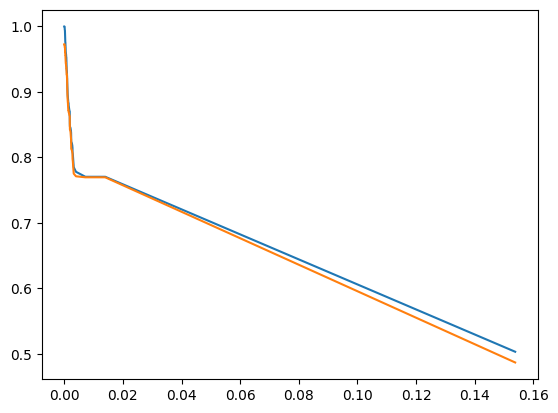

In [199]:
matplotlib.pyplot.plot(ccp_alphas,train_data_acc)
matplotlib.pyplot.plot(ccp_alphas,test_data_acc)

In [200]:
# we have to select point where we get maximum train and test data accuracy 

In [201]:
max(test_data_acc)

0.9727506426735218

In [203]:
index = numpy.argmax(test_data_acc)
index

0

In [204]:
test_data_acc[index]

0.9727506426735218

In [205]:
train_data_acc[index]

1.0

In [ ]:
# again build model using ccp alpha and evalute the model

In [206]:
dt_pru_model = DecisionTreeClassifier(random_state=10,ccp_alpha=0,max_depth=9,min_samples_leaf=4,min_samples_split=4)
dt_pru_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=9, min_samples_leaf=4,
                       min_samples_split=4, random_state=10)

In [207]:
# evalution of train dataset:
y_pred_train = dt_pru_model.predict(x_train)
y_pred_train

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [208]:
conf_mat = confusion_matrix(y_train,y_pred_train)
conf_mat

array([[3210,  653],
       [ 179, 3735]], dtype=int64)

In [209]:
clf_repo = classification_report(y_train,y_pred_train)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      3863
           1       0.85      0.95      0.90      3914

    accuracy                           0.89      7777
   macro avg       0.90      0.89      0.89      7777
weighted avg       0.90      0.89      0.89      7777



In [210]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.893017873215893

In [211]:
# evalution of test dataset:

In [212]:
y_pred_test = dt_pru_model.predict(x_test)
y_pred_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [213]:
conf_mat = confusion_matrix(y_test,y_pred_test)
conf_mat

array([[818, 180],
       [ 54, 893]], dtype=int64)

In [214]:
clf_repo = classification_report(y_test,y_pred_test)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       998
           1       0.83      0.94      0.88       947

    accuracy                           0.88      1945
   macro avg       0.89      0.88      0.88      1945
weighted avg       0.89      0.88      0.88      1945



In [215]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.8796915167095116

# 4.Random Forest:

In [216]:
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [217]:
y_pred_train = rf.predict(x_train)
y_pred_train

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [218]:
cnf_mat = confusion_matrix(y_train,y_pred_train)
cnf_mat

array([[3863,    0],
       [   0, 3914]], dtype=int64)

In [219]:
clf_repo = classification_report(y_train,y_pred_train)
print(clf_repo)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3863
           1       1.00      1.00      1.00      3914

    accuracy                           1.00      7777
   macro avg       1.00      1.00      1.00      7777
weighted avg       1.00      1.00      1.00      7777



In [220]:
acc = accuracy_score(y_train,y_pred_train)
acc

1.0

In [221]:
# evaluation of test dataset:

In [222]:
y_pred_test = rf.predict(x_test)
y_pred_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [223]:
cnf_mat = confusion_matrix(y_test,y_pred_test)
cnf_mat

array([[980,  18],
       [  0, 947]], dtype=int64)

In [224]:
clf_repo = classification_report(y_test,y_pred_test)
print(clf_repo)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       998
           1       0.98      1.00      0.99       947

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



In [225]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.990745501285347

In [226]:
# hyperparameter tunning:

In [227]:
rf_hyp = RandomForestClassifier()
hyperparameters={'n_estimators': [10, 20, 30],
                 'max_depth': [5, 10],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}
gscv_rf_model = GridSearchCV(rf_hyp,hyperparameters,cv=5)
gscv_rf_model.fit(x_train,y_train)
gscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=10)

In [228]:
rf_hyp_model = gscv_rf_model.best_estimator_
rf_hyp_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=10)

In [229]:
y_pred_train = rf_hyp_model.predict(x_train)
y_pred_train

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [230]:
cnf_mat = confusion_matrix(y_train,y_pred_train)
cnf_mat

array([[3475,  388],
       [ 105, 3809]], dtype=int64)

In [231]:
clf_repo = classification_report(y_train,y_pred_train)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3863
           1       0.91      0.97      0.94      3914

    accuracy                           0.94      7777
   macro avg       0.94      0.94      0.94      7777
weighted avg       0.94      0.94      0.94      7777



In [232]:
acc = accuracy_score(y_train,y_pred_train)
acc

0.9366079465089366

In [233]:
y_pred_test = rf_hyp_model.predict(x_test)
y_pred_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [234]:
cnf_mat = confusion_matrix(y_test,y_pred_test)
cnf_mat

array([[871, 127],
       [ 31, 916]], dtype=int64)

In [235]:
clf_repo = classification_report(y_test,y_pred_test)
print(clf_repo)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       998
           1       0.88      0.97      0.92       947

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945



In [236]:
acc = accuracy_score(y_test,y_pred_test)
acc

0.9187660668380463

In [237]:
predict_data_project2 = {'gender': {'Male': 0, 'Female': 1},
                'ever_married': {'Yes':0 , 'No': 1},
                'Residence_type': {'Urban':0,'Rural':1},
                'column': df.columns.tolist()}
predict_data_project2

{'gender': {'Male': 0, 'Female': 1},
 'ever_married': {'Yes': 0, 'No': 1},
 'Residence_type': {'Urban': 0, 'Rural': 1},
 'column': ['gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'stroke',
  'work_type_Govt_job',
  'work_type_Never_worked',
  'work_type_Private',
  'work_type_Self-employed',
  'work_type_children',
  'smoking_status_Unknown',
  'smoking_status_formerly smoked',
  'smoking_status_never smoked',
  'smoking_status_smokes']}